In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from IPython.display import Video
%matplotlib widget
plt.style.use('dark_background')

In [2]:
A = SlabExact(ns=[1.], Ts=[15], xrefs=[1000], symmetric=True)

## Propagation for Double Delta function

In [4]:
Propagator = A.propagator()

In [62]:
s = 5
exact_transform = lambda Z, s=s: A.delta_transform(Z, s=s) +  A.delta_transform(Z, s=-s)

In [69]:
P_prop1 = Propagator(A.real_contour(0, .9*A.Z_evanescent, 500), exact_transform=exact_transform)
P_prop2 = Propagator(A.real_contour(.9*A.Z_evanescent, A.Z_evanescent, 100), exact_transform=exact_transform)


(<Figure size 1100x400 with 1 Axes>, <Axes: >)

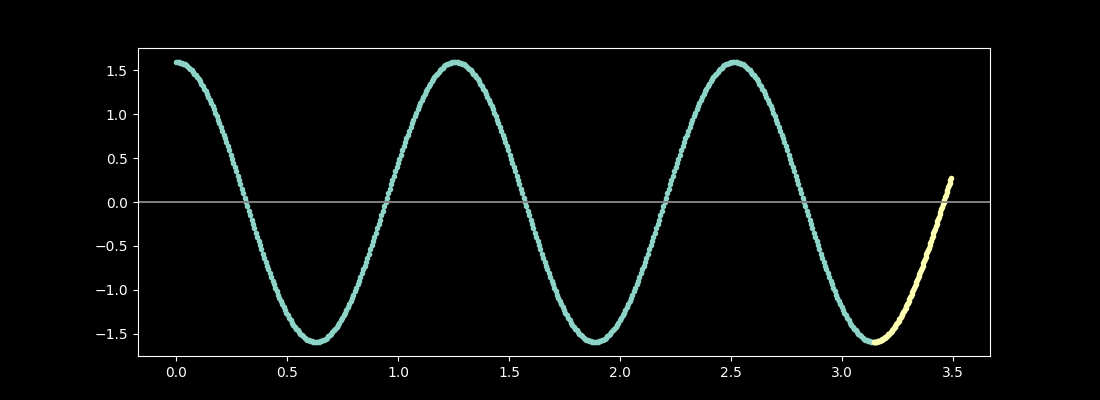

In [70]:
P_prop1.plot_transform()
P_prop2.plot_transform(ax=plt.gca())
# P_evanescent_even.plot_transform(ax=plt.gca())

In [73]:
P_ev1 = Propagator(A.real_contour(A.Z_evanescent, A.Z_evanescent+.5, 100), exact_transform=exact_transform)
P_ev2 = Propagator(A.real_contour(A.Z_evanescent+.5, 40, 5000), exact_transform=exact_transform)


(<Figure size 1100x400 with 1 Axes>, <Axes: >)

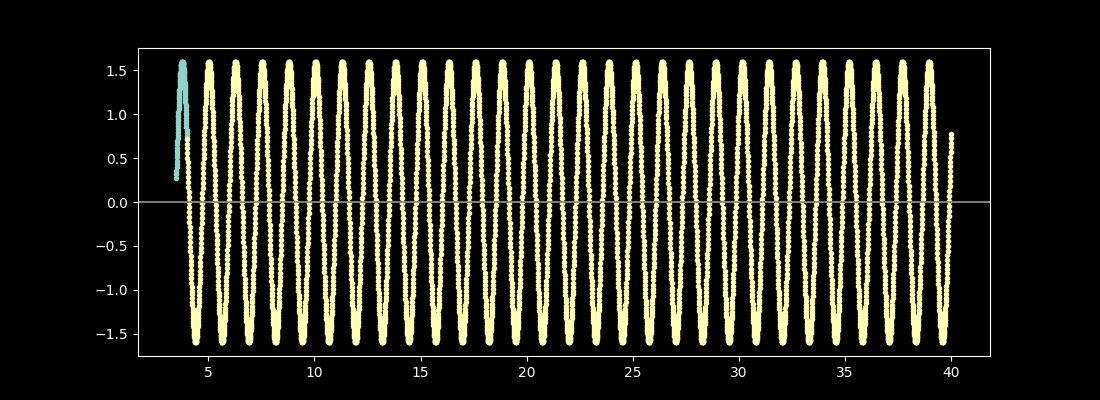

In [74]:
P_ev1.plot_transform()
P_ev2.plot_transform(ax=plt.gca())
# P_evanescent_even.plot_transform(ax=plt.gca())

In [75]:
z0 = 0
prop = lambda x: P_prop1.slice_propagate(x, z0) + P_prop2.slice_propagate(x, z0)
ev = lambda x: P_ev1.slice_propagate(x, z0) + P_ev2.slice_propagate(x, z0)
full = lambda x: prop(x) + ev(x)

Prop = lambda x, z: P_prop1.propagate(x, z) + P_prop2.propagate(x, z)
Ev = lambda x, z: P_ev1.propagate(x, z) + P_ev2.propagate(x, z)
Full = lambda x, z : Prop(x,z) + Ev(x,z)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

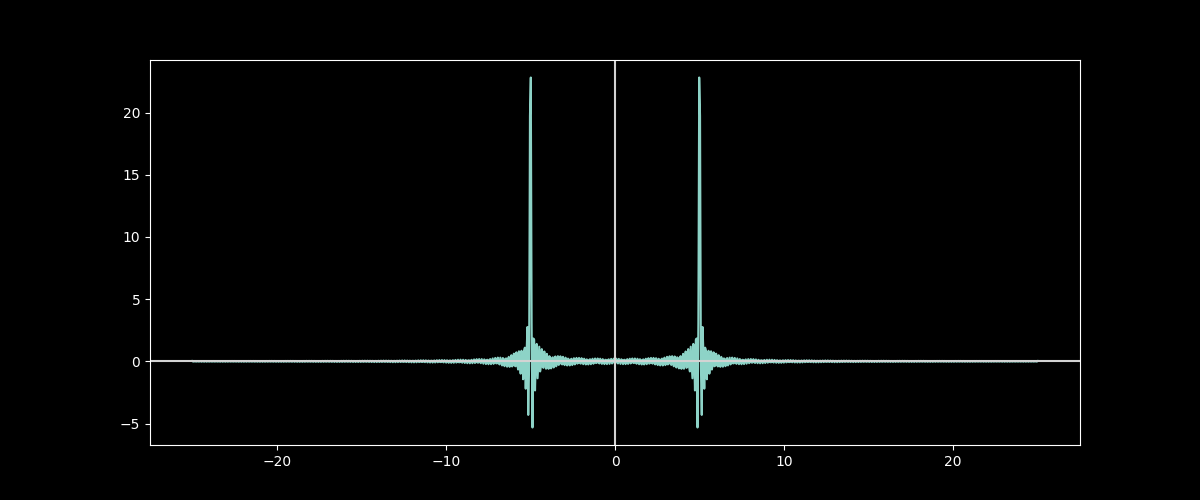

In [76]:
plt.close('all')
A.plot_field_1d(full, xs=np.linspace(-25, 25, 1000))

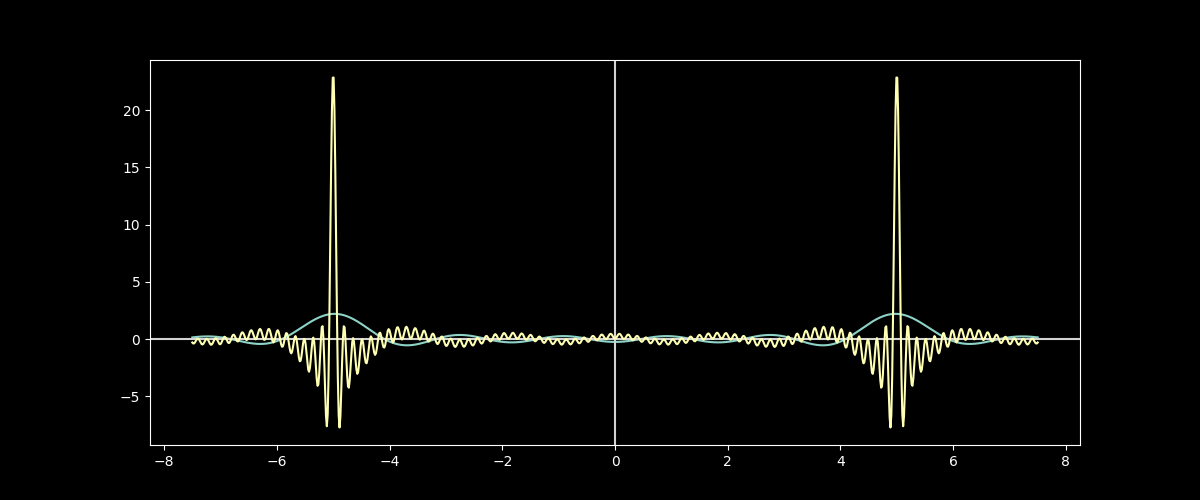

In [77]:
plt.close('all')
A.plot_field_1d(prop)
A.add_1d_plot(ev)

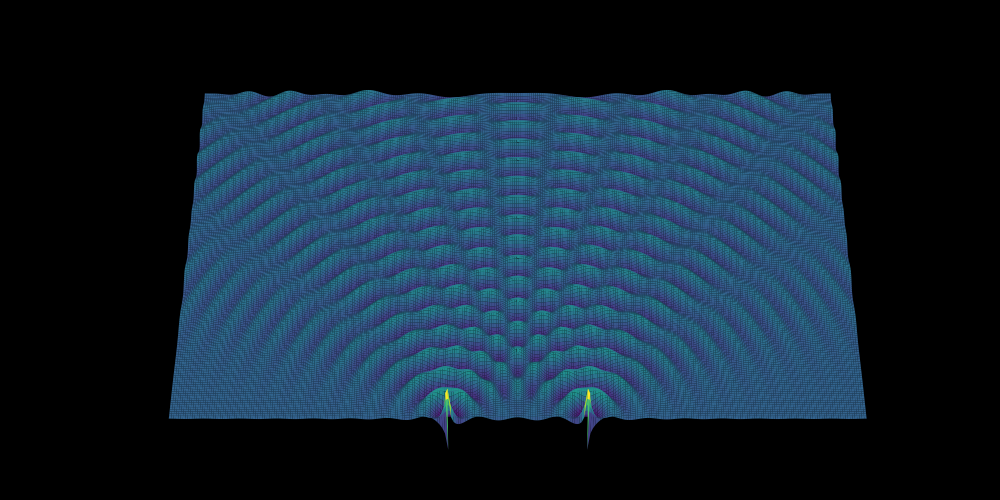

In [78]:
A.plot_field_2d_surface(Full, xs=np.linspace(-25, 25, 300), zmax=30, zref=200, cstride=1, rstride=1);

In [79]:
# A.plot_field_2d_surface(Prop, xs=np.linspace(-25, 25, 200), zmax=30, zref=200, cstride=1, rstride=1);

In [80]:
# A.plot_field_2d_surface(Ev, xs=np.linspace(-25, 25, 600), zmax=30, zref=50, cstride=1, rstride=1);

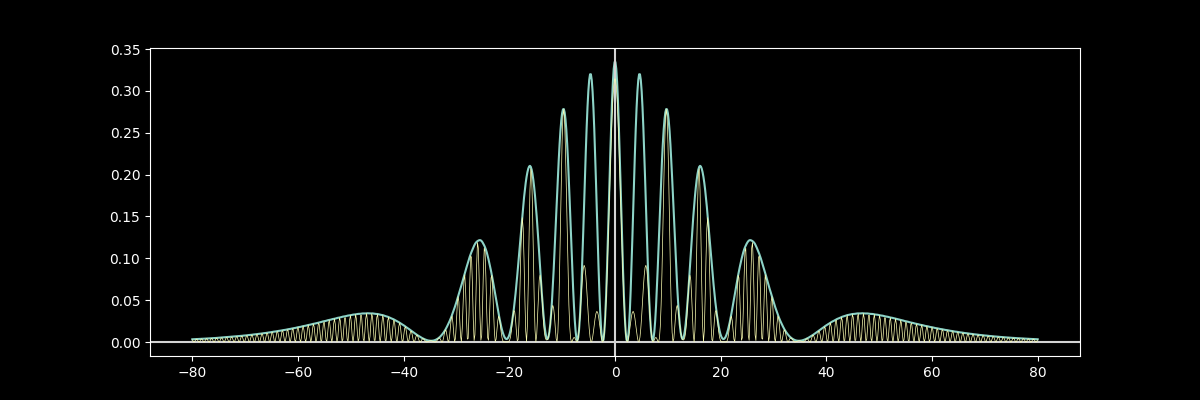

In [102]:
plt.close('all')
z0=25
A.plot_field_1d(lambda x: np.abs(full(x))**2, xs=np.linspace(-80, 80, 1000), figsize=(12, 4))
A.add_1d_plot(lambda x: np.abs(full(x).real)**2, xs=np.linspace(-80, 80, 1000), linewidth=.5)
# A.add_1d_plot(lambda x: np.abs(full(x).imag)**2, xs=np.linspace(-80, 80, 1000), linewidth=.5)
# A.add_1d_plot(prop, xs=np.linspace(-80, 80, 1000))
# A.add_1d_plot(ev, xs=np.linspace(-80, 80, 1000))

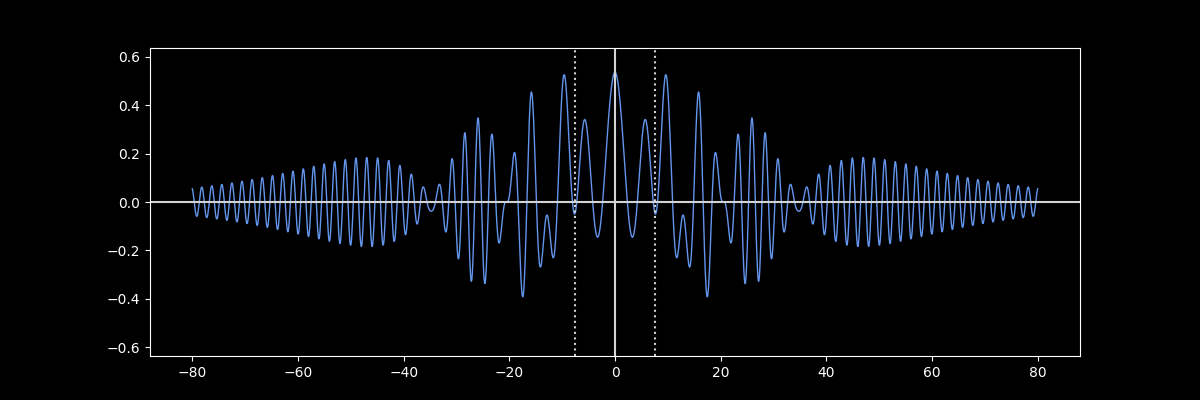

In [100]:
A.animate_field_1d(prop, 'delta_double_slit', figsize=(12, 4), xs=np.linspace(-80,80,2000), fps=30, secs=1.5, linewidth=1.,
                  color='cornflowerblue')

In [101]:
Video(filename='delta_double_slit.mp4', html_attributes='loop controls')